# Importing all Libraries

In [ ]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
import datetime as dt

#Importing all the models and all dependent libraries.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [2]:
#Creating an empty dataframe.
df = pd.DataFrame()
#Printing shape of the dataframe
print(df.shape)

def read_trip_data (file_path):
    global df
    var_tab = pd.read_parquet(file_path)
    #temp_df = var_tab.to_pandas()
    df = df.append(var_tab, ignore_index = True)
    print(f"{df.shape} records hvae been appended")

(0, 0)


In [3]:
#Creating a list of all the files that needs to be imported
#file_name = [
     #'green_tripdata_2022-01.parquet',
     #'green_tripdata_2022-02.parquet',
     #'green_tripdata_2022-03.parquet',
     #'green_tripdata_2022-04.parquet',
     #'green_tripdata_2022-05.parquet',
     #'green_tripdata_2022-06.parquet',
     #'green_tripdata_2022-07.parquet',
     #'green_tripdata_2022-08.parquet',
     #'green_tripdata_2022-09.parquet',
     #'green_tripdata_2022-10.parquet',
     #'green_tripdata_2022-11.parquet',
     #'green_tripdata_2022-12.parquet',
     #'green_tripdata_2023-01.parquet']

file_name = [
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-05.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-06.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-07.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-08.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-09.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-10.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-11.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-12.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet']

#Calling the defined function [read_merge(file_path)] to import data
for i in file_name:
    print(f"Loading {i} file.")
    read_trip_data(i)
    print(f"-----------------------------------File Loaded {i} ----------------------------------------")


Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet file.
(62495, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet file.
(131894, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet file.
(210431, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet file.
(286567,

In [4]:
taxizonefilepath = 'taxi+_zone_lookup.csv'
taxizone_df = pd.read_csv(taxizonefilepath)
print(taxizone_df.shape)
print(taxizone_df.info())
taxizone_df.head(5)

(265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [5]:
holidaysfilepath = 'Holidays.csv'
holidays_df = pd.read_csv(holidaysfilepath)
print(holidays_df.shape)
print(holidays_df.info())
holidays_df.head(5)

(23, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Holidays  23 non-null     object
dtypes: object(1)
memory usage: 312.0+ bytes
None


,Holidays
0,01-01-2022
1,17-01-2022
2,21-02-2022
3,30-05-2022
4,04-07-2022


# Data Exploration

In [6]:
print('Trip DataSet shape',df.shape)
print('Taxi Zone Dataset shape', taxizone_df.shape)
print('Holidays Dataset shape', holidays_df.shape)

Trip DataSet shape (908613, 20)
Taxi Zone Dataset shape (265, 4)
Holidays Dataset shape (23, 1)


In [7]:
print(df.info())
print(taxizone_df.info())
print(holidays_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908613 entries, 0 to 908612
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               908613 non-null  int64         
 1   lpep_pickup_datetime   908613 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  908613 non-null  datetime64[ns]
 3   store_and_fwd_flag     813949 non-null  object        
 4   RatecodeID             813949 non-null  float64       
 5   PULocationID           908613 non-null  int64         
 6   DOLocationID           908613 non-null  int64         
 7   passenger_count        813949 non-null  float64       
 8   trip_distance          908613 non-null  float64       
 9   fare_amount            908613 non-null  float64       
 10  extra                  908613 non-null  float64       
 11  mta_tax                908613 non-null  float64       
 12  tip_amount             908613 non-null  floa

<AxesSubplot:>

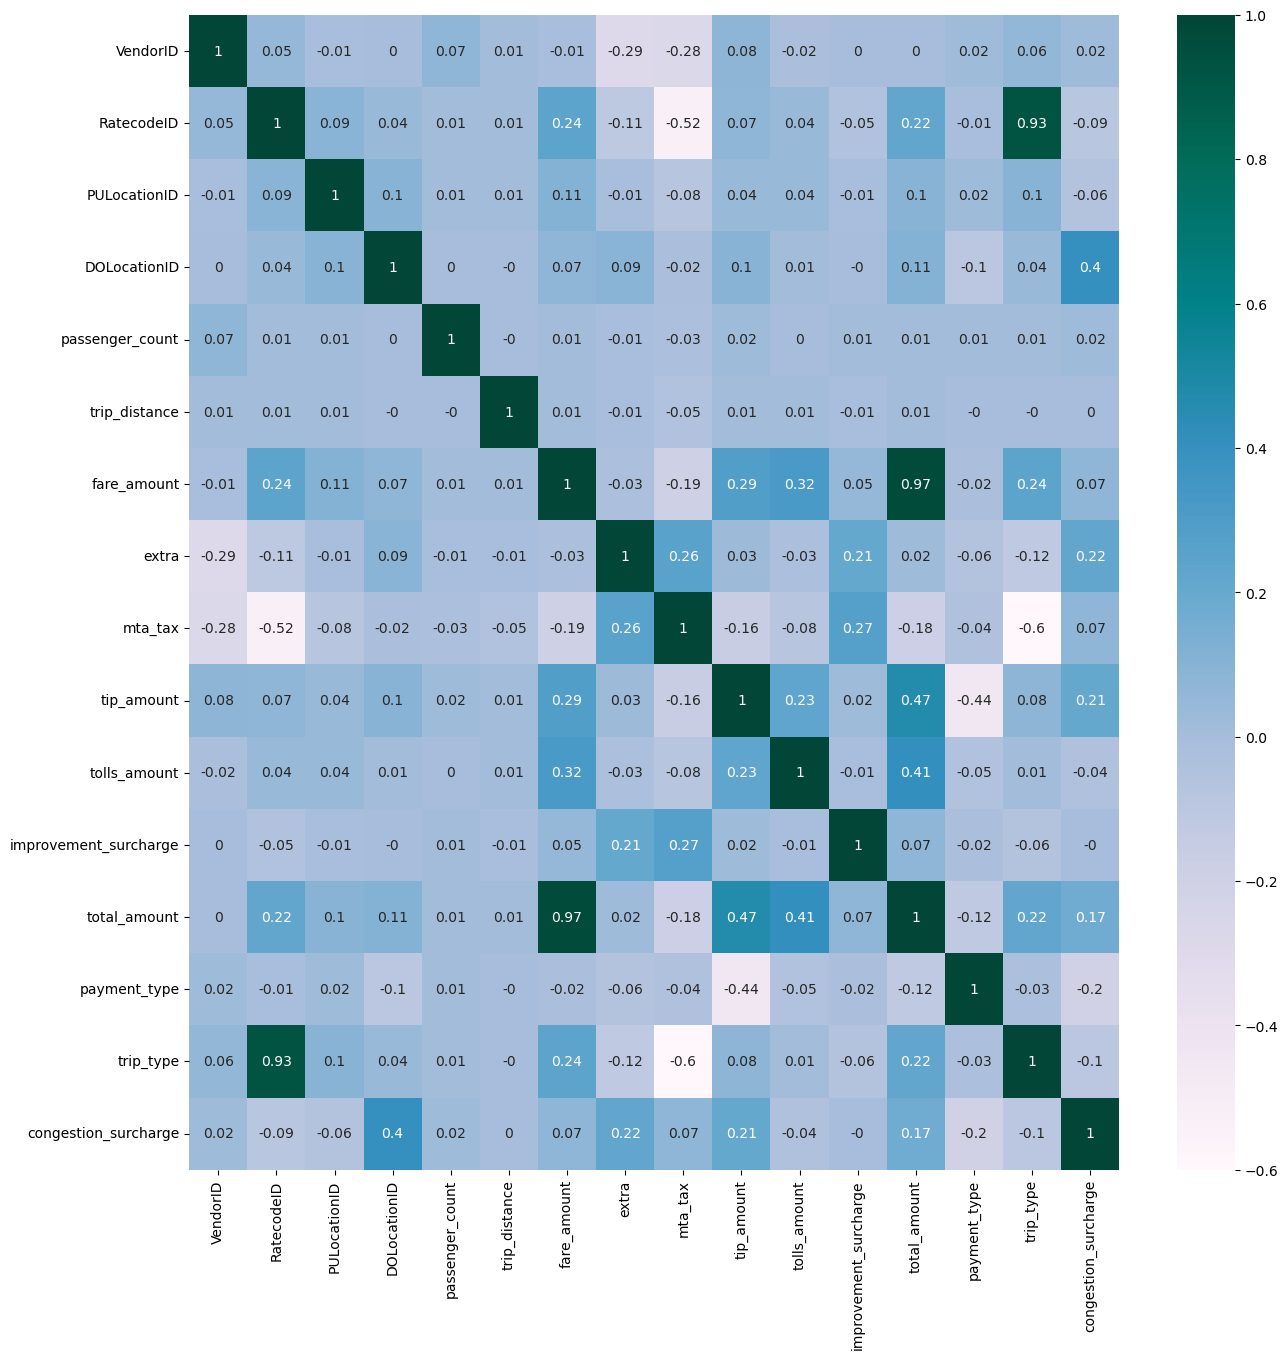

In [8]:
#Checking all the correlation with the help of correlation matrix
import matplotlib.pyplot as py
fig, ax =  py.subplots(figsize=(15,15))
sns.heatmap(round(df.corr(),2), annot=True, cmap='PuBuGn')

# Data Pre-Processing

## Dropping unwanted columns

In [9]:
#Reasons for dropping following columns:
#ehail_fee : this column have 0 records
#passenger_count: As the number of passengers are added by the driver it might be inaccurate.
#store_and_fwd_flag,trip_type,payment_type we are dropping as they are not required for our price prediction.
df.drop(columns = ['store_and_fwd_flag','ehail_fee','trip_type','payment_type','passenger_count'],inplace = True)

## Checking and dropping Null values

In [10]:
#Trip Dataset:
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
RatecodeID               94664
PULocationID                 0
DOLocationID                 0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     94664
dtype: int64
VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


## Filtering Data

In [11]:
#Checking corrupted records for 'trip_distance' as it is one of the essential component for our analysis.
print(df.trip_distance.describe())
#To verify and remove records with the distance in negative or 0 miles or more than 100 miles.
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
print(df.shape)

count    813949.000000
mean          3.314655
std         195.225090
min           0.000000
25%           1.100000
50%           1.900000
75%           3.410000
max      115402.900000
Name: trip_distance, dtype: float64
(762930, 15)


In [12]:
#Renaming pickup and dropoff date columns
df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime'})

#Calculating trip time in minutes
df['trip_time'] = round((df['dropoff_datetime'] - df['pickup_datetime']) / np.timedelta64(60,'s'),2)

#Checking corrupted records for 'trip_time' as we will be predicting it.
print(df['trip_time'].describe())

#Dropping all the records where 'trip_time' is more than 3hours i.e 180 mins.
df = df[df['trip_time'] < 180]
print(df.shape)

count    762930.000000
mean         19.739631
std          79.173614
min         -54.020000
25%           7.570000
50%          11.880000
75%          18.380000
max        1439.920000
Name: trip_time, dtype: float64
(759305, 16)


In [13]:
#Checking corrupted records for 'fare_amount' as we will be predicting it.
print(df['fare_amount'].describe())
#Filtering all the rows where the amount is less than $3 as it is the base fare.
#Ref for base fare--> https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
df = df[df['fare_amount'] > 3]
print(df.shape)

count    759305.000000
mean         14.002241
std          12.544997
min        -300.000000
25%           7.500000
50%          10.500000
75%          16.300000
max         499.000000
Name: fare_amount, dtype: float64
(750433, 16)


In [14]:
#Extracting Date and Time from pickup and drop date column.

df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime'].dt.date)

#Marking if the trip is recorded in peak hour or not.
# Adding peak_hours as [7,8,9,18,19,20]
df['peak_hours'] = df['pickup_hour'].apply(lambda x: 1 if x in [7,8,9,10,17,18,19] else 0)

#Flagging if trip was recorded on a holiday or not.
holidays_df['Holidays'] = pd.to_datetime(holidays_df['Holidays'])
df = pd.merge(df, holidays_df, left_on='pickup_date', right_on='Holidays', how='left')
df['Holidays'].fillna(False, inplace=True)
df['holiday_flag'] = df['Holidays'].apply(lambda x: 0 if x is False else 1)
df = df.drop(columns = 'Holidays')
df.drop(columns = ['pickup_datetime','dropoff_datetime','pickup_date','dropoff_date'],inplace = True)
print(df.shape)

(750433, 19)


# Splitting Data

In [15]:
y = df['fare_amount']
X = df.drop(columns=['fare_amount'])
X = pd.get_dummies(X, columns=['VendorID','peak_hours','holiday_flag','pickup_dayofweek','pickup_hour'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

# One Hot Encoding

## PCA

[0.60154728 0.96024665 0.99077752 0.99583951 0.9986057  0.99912636
 0.99940036 0.99952858 0.99962199 0.9996913  0.99975066 0.99980047
 0.99981902 0.99983491 0.99985049 0.99986574 0.9998803  0.99989341
 0.99990488 0.99991263 0.99991976 0.99992671 0.99993336 0.99993961
 0.99994542 0.99995116 0.99995668 0.99996196 0.99996709 0.99997208
 0.99997646 0.99998063 0.99998454 0.9999879  0.9999906  0.99999324
 0.99999484 0.99999613 0.99999739 0.99999824 0.99999885 0.99999935
 0.99999981 1.         1.         1.         1.         1.
 1.         1.        ]


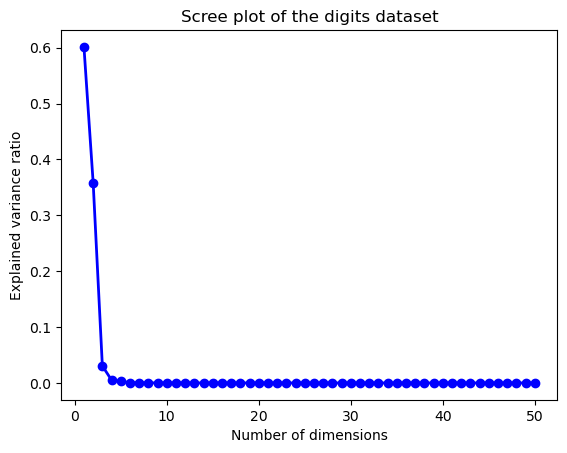

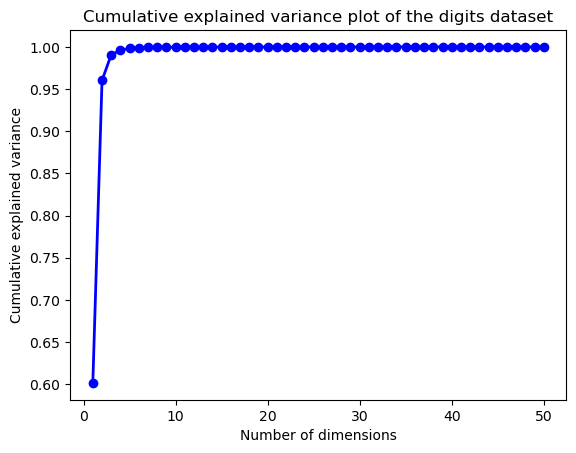

In [16]:
from sklearn.decomposition import PCA

# Perform PCA on the dataset and calculate the explained variance ratio
pca = PCA(n_components=X.shape[1])
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)
# Visualize the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2)
plt.xlabel('Number of dimensions')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot of the digits dataset')
plt.show()

# Visualize the cumulative explained variance plot
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance plot of the digits dataset')
plt.show()

In [17]:
X_train

,RatecodeID,PULocationID,DOLocationID,trip_distance,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
480818,1.0,41,237,3.29,0.0,0.5,3.00,0.0,0.3,21.55,...,0,0,0,0,0,0,0,0,0,0
244463,1.0,24,239,1.30,0.0,0.5,2.51,0.0,0.3,12.56,...,0,0,0,0,0,0,0,0,0,0
181867,1.0,116,152,0.69,1.0,0.5,0.00,0.0,0.3,8.30,...,0,0,0,0,1,0,0,0,0,0
459665,1.0,74,140,4.07,0.0,0.5,3.71,0.0,0.3,22.26,...,0,0,0,0,0,0,0,0,0,0
637764,1.0,129,138,2.79,0.0,0.5,0.00,0.0,0.3,11.30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385604,1.0,74,24,1.80,1.0,0.5,1.00,0.0,0.3,11.80,...,0,0,0,0,0,1,0,0,0,0
573603,1.0,75,42,2.01,0.0,0.5,0.00,0.0,0.3,8.80,...,0,0,1,0,0,0,0,0,0,0
606141,5.0,74,159,2.32,0.0,0.0,0.00,0.0,0.3,10.30,...,0,0,0,0,0,0,1,0,0,0
399228,1.0,75,74,1.34,1.0,0.5,0.00,0.0,0.3,7.80,...,0,0,1,0,0,0,0,0,0,0


In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components =3)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#  Model Training and Testing

In [102]:
## Linear Regression:
def tuned_linear_regression(X_train, y_train, X_test, y_test, param_grid=None):
    lm = LinearRegression()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'fit_intercept': [None, True, False]}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(lm, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_lm = grid_search.best_estimator_
    y_pred = best_lm.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))   
tuned_linear_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'fit_intercept': True}
Mean Squared Error: 18.981418213179246
R-squared: 0.8791096010473273
Adjusted R-squared: 0.8791096010473273
Mean Absoute Error: 1.9822250965201476
Predicted Prices: [ 3.58636388 13.0634134   6.00107396 ...  3.69141104  6.11155134
  6.18842889]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64


In [ ]:
## Decision Tree Regression:
def tuned_decisiontree_regression(X_train, y_train, X_test, y_test, param_grid=None):
    dtr_model = DecisionTreeRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'max_depth': [3, 5, 7],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': [None, 'sqrt', 'log2'],
                        'criterion': ['mse', 'friedman_mse', 'mae']}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(dtr_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_decisiontree_regression(X_train_pca,y_train,X_test_pca,y_test)

In [20]:
## KNN Regression:
def tuned_KNN_regression(X_train, y_train, X_test, y_test, param_grid=None):
    knn_model = KNeighborsRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(knn_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_KNN_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Mean Squared Error: 11.820308256057734
R-squared: 0.9247178601319563
Adjusted R-squared: 0.9247178601319563
Mean Absoute Error: 1.3030375341637086
Predicted Prices: [ 4.67325835 12.53593933  6.7955804  ... 10.          6.91481684
  6.62437765]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64
Predicted Prices: [ 4.67325835 12.53593933  6.7955804  ... 10.          6.91481684
  6.62437765]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64


In [21]:
## Lasso Regression:
def tuned_lasso_regression(X_train, y_train, X_test, y_test, param_grid=None):
    lasso_model = Lasso()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'alpha': [0.001, 0.01,0.01838973299508956, 0.1, 1, 10]}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_lasso_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'alpha': 0.1}
Mean Squared Error: 18.981209889699237
R-squared: 0.8791109278348374
Adjusted R-squared: 0.8791109278348374
Mean Absoute Error: 1.9803914693598939
Predicted Prices: [ 3.59072491 13.06137937  6.00607018 ...  3.69282971  6.116926
  6.19476783]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64
Predicted Prices: [ 3.59072491 13.06137937  6.00607018 ...  3.69282971  6.116926
  6.19476783]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64


In [24]:
## Ridge Regression:
def tuned_ridge_regression(X_train, y_train, X_test, y_test, param_grid=None):
    lasso_model = Ridge()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'alpha': [0.001, 0.01,0.01838973299508956, 0.1, 1, 10],
                      'normalize': [True, False],
                      'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_ridge_regression(X_train_pca,y_train,X_test_pca,y_test)

Best Parameters: {'alpha': 0.1, 'normalize': False, 'solver': 'sag'}
Mean Squared Error: 18.981924831490833
R-squared: 0.879106374455451
Adjusted R-squared: 0.879106374455451
Mean Absoute Error: 1.9846622774631488
Predicted Prices: [ 3.5736291  13.05080304  5.99475435 ...  3.67281911  6.1087094
  6.18699228]
Actual Prices: 83448      5.0
406748    11.5
651367     7.5
Name: fare_amount, dtype: float64


In [ ]:
## Gradiant Booster Regression:
def tuned_gb_regression(X_train, y_train, X_test, y_test, param_grid=None):
    gb_model = GradientBoostingRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_estimators': [50, 100, 200],
                        'max_depth': [3, 5, 7],
                        'learning_rate': [0.05, 0.1, 0.2],
                        'max_features': ['auto', 'sqrt']}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(gb_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_gb_regression(X_train_pca,y_train,X_test_pca,y_test)

In [ ]:
#XGB Regressor:

def tuned_xgb_regression(X_train, y_train, X_test, y_test, param_grid=None):
    xgb_model = XGBRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {  'max_depth': [3, 5, 7],
                        'learning_rate': [0.01, 0.05, 0.1],
                        'n_estimators': [100, 200, 500],
                        'subsample': [0.5, 0.7, 0.9],
                        'colsample_bytree': [0.5, 0.7, 0.9],
                        'reg_alpha': [0, 0.1, 0.5],
                        'reg_lambda': [0, 0.1, 0.5]}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_xgb_regression(X_train_pca,y_train,X_test_pca,y_test)

In [ ]:
#Random Forest Regressor:

def tuned_rf_regression(X_train, y_train, X_test, y_test, param_grid=None):
    rf_model = RandomForestRegressor()
    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_estimators': [100, 200, 300],
                        'max_depth': [5, 10, 15],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['sqrt', 'log2']}
    
    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(rf_model, param_grid, cv=5)
    grid_search.fit(X_train_pca, y_train)

    # make predictions on the test set using the best model
    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test_pca)

    #display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = pca.n_components_
    adj_r_squared = 1 - (1-r2)*(n-1)/(n-k-1)
    mae = mean_absolute_error(y_test, y_pred)
    print("Best Parameters:", grid_search.best_params_)
    print('Mean Squared Error:',mse)
    print('R-squared:',r2)
    print('Adjusted R-squared:',r2)
    print('Mean Absoute Error:',mae)
    print('Predicted Prices:',y_pred)
    print('Actual Prices:',y_test.head(3))
    
tuned_rf_regression(X_train_pca,y_train,X_test_pca,y_test)